<a href="https://colab.research.google.com/github/Yi-Wei-Lin/Tibame_ML_20210602/blob/main/cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
names = ["ariplane",
      "automobile",
      "bird",
      "cat",
      "deer",
      "dog",
      "frog",
      "horse",
      "ship",
      "truck"
      ]

dog


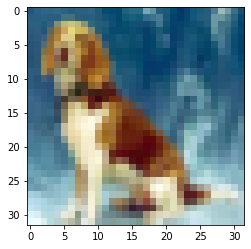

In [4]:
# mnist: (60000, ) [5,2,1,0]
import matplotlib.pyplot as plt
import random
idx = random.randint(0,49999)
ans = y_train[idx][0]
print(names[ans])
plt.imshow(x_train[idx])

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
layers = [
  # 3 * 3 * 3(一個) * 64 + 64(bias) = 1792
  Conv2D(64,3, activation="relu", padding="same", input_shape=(32,32,3)),
  MaxPooling2D(),
  # 3 * 3 * 64(一個) * 128 + 128(bias) =  73856
  Conv2D(128,3, activation="relu", padding="same"),
  MaxPooling2D(),
  Conv2D(256,3, activation="relu", padding="same"),
  MaxPooling2D(),
  Flatten(),
  Dense(128, activation="relu"),
  # 128 * 10 + 10(bias) = 1290
  Dropout(0.25),
  Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)             

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy,
        optimizers=Adam(),
        metrics=["accuracy"])

In [ ]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0